# Rossmann Store Sales

**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

In [1]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from statistics import mean, stdev
sns.set(style="white")
# Pretty display for notebooks
%matplotlib inline     

# other library
import time


**Loading the data
We load purely the training set data here.**

In [2]:
pr_train=pd.read_csv("train.csv")
pr_test=pd.read_csv("test.csv")
pr_store=pd.read_csv("store.csv")

C:\Users\Hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pr_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
pr_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
pr_train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [6]:
pr_train.shape

(1017209, 9)

In [7]:
pr_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
pr_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# EDA


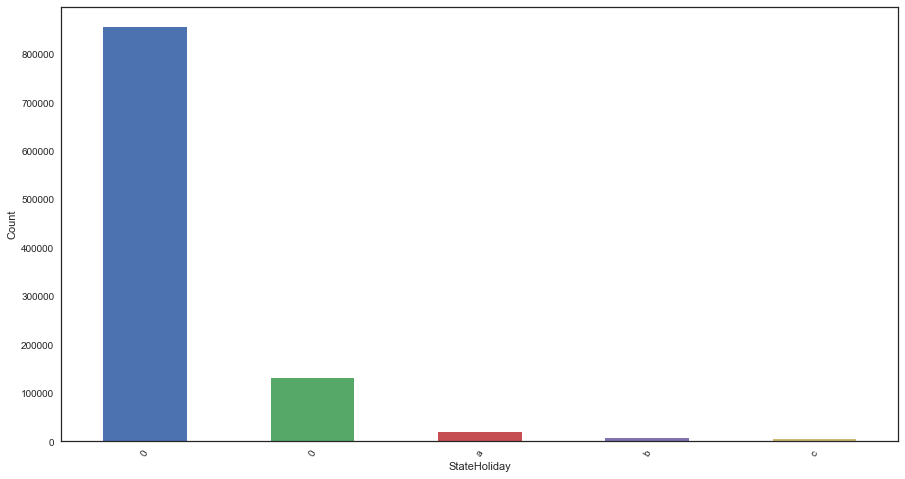

In [9]:
f,ax=plt.subplots(figsize=(15,8))
pr_train['StateHoliday'].value_counts()[:60].plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('StateHoliday')
plt.xticks(rotation=60);

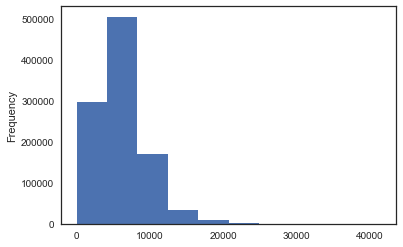

In [10]:
pr_train['Sales'].plot.hist()

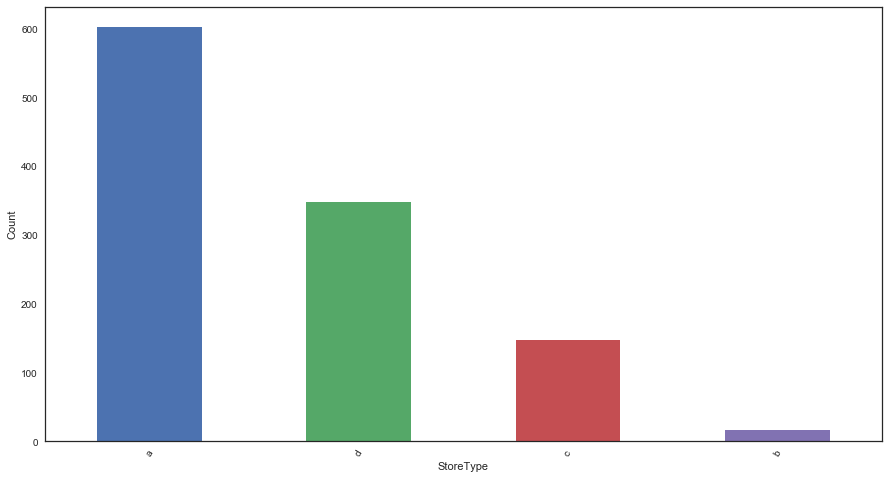

In [11]:
f,ax=plt.subplots(figsize=(15,8))
pr_store['StoreType'].value_counts()[:60].plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('StoreType')
plt.xticks(rotation=60);

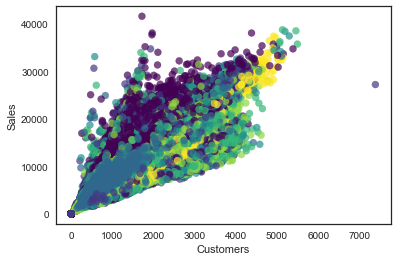

In [12]:
plt.scatter(pr_train['Customers'], pr_train['Sales'], c=pr_train['DayOfWeek'], alpha=0.7, cmap=plt.cm.get_cmap('viridis'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

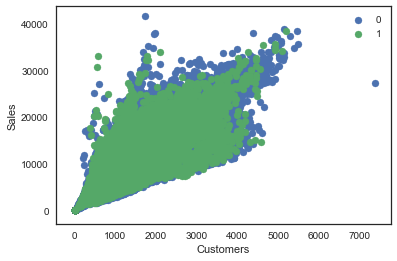

In [13]:

for i in [0, 1]:
    data = pr_train[pr_train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [14]:
pr_train['Date'] = pd.to_datetime(pr_train['Date'],format = '%Y-%m-%d')
store_id = pr_train.Store.unique()[0]
store_train_rows = pr_train[pr_train['Store']==store_id]
store_train_rows['Date'].min(), store_train_rows['Date'].max()



(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [15]:
pr_test['Date'] = pd.to_datetime(pr_test['Date'],format = '%Y-%m-%d')
store_id = pr_test.Store.unique()[0]
store_train_rows = pr_test[pr_test['Store']==store_id]
store_train_rows['Date'].min(), store_train_rows['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [16]:
print(pr_train['StateHoliday'].unique())

pr_train['StateHoliday'] = pr_train['StateHoliday'].map({'0':0, 0:0,'a':1,'b':2,'c':3}).astype(int)

['0' 'a' 'b' 'c' 0]


In [17]:
print(pr_train.shape,pr_store.shape)

((pr_store.isnull()|pr_store.isna()).sum()*100 /pr_store.index.size).round(2)


(1017209, 9) (1115, 10)


Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

**filling null values with forword and backword filling**


In [18]:
pr_store['PromoInterval']=pr_store['PromoInterval'].ffill().bfill()
pr_store['Promo2SinceYear']=pr_store['Promo2SinceYear'].ffill().bfill()
pr_store['Promo2SinceWeek']=pr_store['Promo2SinceWeek'].ffill().bfill()
pr_store['CompetitionOpenSinceMonth']=pr_store['CompetitionOpenSinceMonth'].ffill().bfill()
pr_store['CompetitionOpenSinceYear']=pr_store['CompetitionOpenSinceYear'].ffill().bfill()
pr_store['CompetitionDistance']=pr_store['CompetitionDistance'].fillna(pr_store['CompetitionDistance'].max())

In [19]:
((pr_store.isnull()|pr_store.isna()).sum()*100 /pr_store.index.size).round(2) 

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [20]:
print(pr_store['StoreType'].unique())
print(pr_store['Assortment'].unique())
print(pr_store['PromoInterval'].unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [21]:
pr_store['StoreType'] = pr_store['StoreType'].map({'c':0, 'a':1,'d':2,'b':3}).astype(int)
pr_store['Assortment'] = pr_store['Assortment'].map({'a':0, 'c':1,'b':2}).astype(int)
pr_store['PromoInterval'] = pr_store['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2}).astype(int)

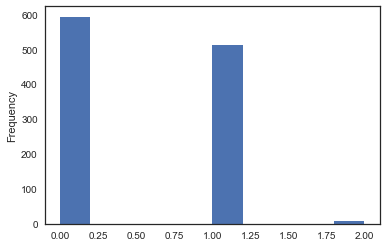

In [22]:
pr_store['Assortment'].plot.hist()

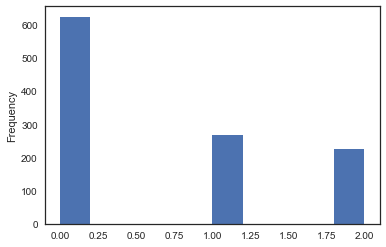

In [23]:
pr_store['PromoInterval'].plot.hist()

In [24]:
pr_merge = pd.merge(pr_train, pr_store, on = 'Store')

In [25]:
pr_merge.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0


In [26]:
(((pr_merge.isnull()|pr_merge.isna()).sum()*100)/pr_merge.index.size).round(2)

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

**Model Buliding**


In [27]:
from sklearn.model_selection import train_test_split
import numpy as np
X = pr_merge.drop(['Sales','Date'],axis=1)
y = pr_merge['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

**DecisionTree**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
model = DecisionTreeRegressor(max_depth=25)
model.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
y_pred_train = model.predict(X_train)
print('r2_score train',r2_score(y_pred_train,y_train))

r2_score train 0.9980287903020294


In [30]:
y_pred = model.predict(X_test)
print('r2_score test',r2_score(y_pred,y_test))

r2_score test 0.9732629572541814


In [31]:
RMSPE = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))*100

In [32]:
print('RMSPE:',RMSPE)

RMSPE: 9.438925035799574


In [33]:
pr_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [34]:
((pr_test.isnull()|pr_test.isna()).sum()*100 /pr_test.index.size).round(2)

Id               0.00
Store            0.00
DayOfWeek        0.00
Date             0.00
Open             0.03
Promo            0.00
StateHoliday     0.00
SchoolHoliday    0.00
dtype: float64

In [35]:
pr_test['Open'].isna().sum()

11

In [36]:
pr_test['Open']=pr_test['Open'].fillna(1)

In [37]:
((pr_test.isnull()|pr_test.isna()).sum()*100 /pr_test.index.size).round(2)

Id               0.0
Store            0.0
DayOfWeek        0.0
Date             0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [38]:
print(pr_test['StateHoliday'].unique())


['0' 'a']


In [39]:
pr_test['StateHoliday'] = pr_test['StateHoliday'].map({'0':0,'a':1}).astype(int)


In [40]:
pr_test['DayOfWeek'].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [41]:
pr_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [42]:
pr_test_merge=pd.merge(pr_test,pr_store,on='Store')

In [43]:
pr_test_merge.shape

(41088, 17)

In [44]:
stores_cus = pr_train.groupby(['Store'])[['Customers']].mean().reset_index().astype(int)
test1 = pr_test.merge(stores_cus,on = 'Store',how = 'left')

In [45]:
test_merge = test1.merge(pr_store,on='Store',how='inner')

In [46]:
test_merge.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,467,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,467,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,467,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,467,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,467,0,0,1270.0,9.0,2008.0,0,13.0,2010.0,0


In [47]:
test_merge.drop(['Date'],axis=1,inplace=True)

In [48]:
test_merge.dtypes

Id                             int64
Store                          int64
DayOfWeek                      int64
Open                         float64
Promo                          int64
StateHoliday                   int32
SchoolHoliday                  int64
Customers                      int32
StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [49]:
test_merge.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Customers                    0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [51]:
print(test_merge.shape)

(41088, 17)


In [52]:
y_pred=model.predict(test_merge[X_train.columns])

In [53]:
pred = pd.DataFrame(y_pred)